Group 5

Sayan De 252082
Mayank 251042
Shruti 253086
Binay 252022
Arnav 252019
Rohit 251066
Raghuram 251061
Abhishek 253004
Puneet 251059
Gokul 252033

In [2]:
!pip install kaggle
from google.colab import userdata
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [3]:
!kaggle datasets download CooperUnion/cardataset

Dataset URL: https://www.kaggle.com/datasets/CooperUnion/cardataset
License(s): unknown
100% 103k/103k [00:00<00:00, 377kB/s]
100% 103k/103k [00:00<00:00, 377kB/s]


In [4]:
!unzip cardataset.zip

Archive:  cardataset.zip
  inflating: data.csv                


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_csv('/content/data.csv')

In [7]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
data.shape

(11914, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [13]:
data['Vehicle Style'].value_counts()

,count
Vehicle Style,
Sedan,3048
4dr SUV,2488
Coupe,1211
Convertible,793
4dr Hatchback,702
Crew Cab Pickup,681
Extended Cab Pickup,623
Wagon,592
2dr Hatchback,506


In [14]:
data.drop('Number of Doors', axis = 1 , inplace = True)

In [15]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
data = data.drop_duplicates()

In [20]:
data.dropna(inplace = True)
data.isnull().sum()

<ipython-input-20-90424a60c0c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Market Category,0
Vehicle Size,0


In [21]:
data.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [24]:
data.groupby('Transmission Type')['Engine HP'].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission Type,,,,,,,,
AUTOMATED_MANUAL,539.0,340.795918,176.330532,120.0,200.0,252.0,509.0,1001.0
AUTOMATIC,5617.0,278.674559,98.390241,73.0,208.0,279.0,320.0,707.0
DIRECT_DRIVE,15.0,161.000000,18.165902,140.0,140.0,170.0,177.0,182.0
MANUAL,1562.0,253.393726,136.270182,55.0,155.0,210.0,328.0,707.0
UNKNOWN,3.0,305.000000,0.000000,305.0,305.0,305.0,305.0,305.0


## Insights

1. The Automated Manual has the highest Avg Horse Power among the different transmisson types

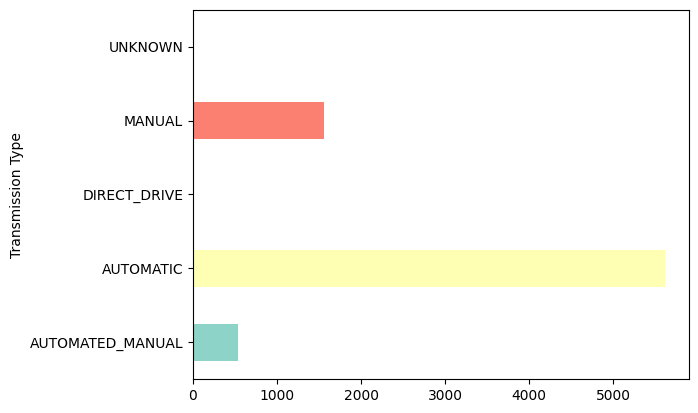

In [103]:
data.groupby('Transmission Type')['Engine HP'].count().plot(kind = 'barh', color = sns.color_palette('Set3'))
plt.show()

2. Automatic Transmisson type is the most occuring transmission type

In [38]:
# Top 5 most occuring brands

top_5 = data.Make.value_counts().head()
top_5

,count
Make,
Chevrolet,608
Ford,485
Volkswagen,411
Cadillac,396
Mercedes-Benz,340


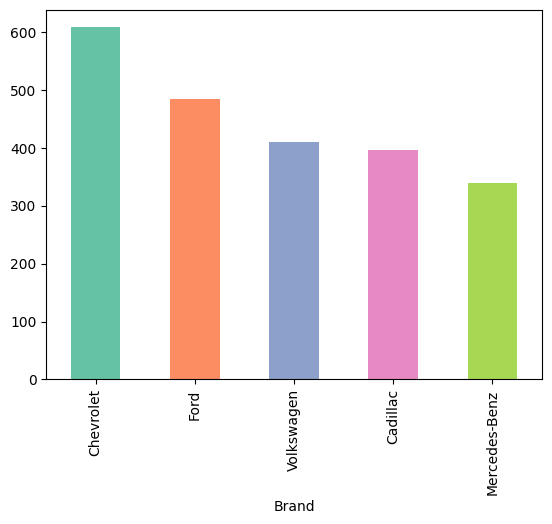

In [102]:
top_5.plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.ylabel(None)
plt.xlabel('Brand')
plt.show()

3. Distribution of car brands

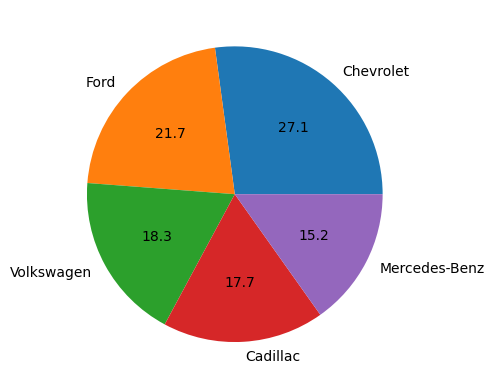

In [108]:
# Distribution of Brands occurence Among the top 5
top_5.plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)
plt.show()

In [109]:
top_5_makes = data['Make'].value_counts().head(5).index.tolist()

df_top_5_makes = data[data['Make'].isin(top_5_makes)]

df_top_5_makes.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
35,Mercedes-Benz,190-Class,1991,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000
36,Mercedes-Benz,190-Class,1991,regular unleaded,158.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,25,17,617,2000
37,Mercedes-Benz,190-Class,1992,regular unleaded,158.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,25,17,617,2000
38,Mercedes-Benz,190-Class,1992,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000
39,Mercedes-Benz,190-Class,1993,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000


Craeting individual Dataframes for the top 5 car makers

In [111]:
df_chev = df_top_5_makes[df_top_5_makes['Make'] == 'Chevrolet']
df_chev.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1571,Chevrolet,Avalanche,2010,flex-fuel (unleaded/E85),320.0,8.0,AUTOMATIC,rear wheel drive,"Crossover,Flex Fuel",Large,Crew Cab Pickup,21,15,1385,45815
1572,Chevrolet,Avalanche,2010,flex-fuel (unleaded/E85),320.0,8.0,AUTOMATIC,rear wheel drive,"Crossover,Flex Fuel",Large,Crew Cab Pickup,21,15,1385,35725
1573,Chevrolet,Avalanche,2010,flex-fuel (unleaded/E85),320.0,8.0,AUTOMATIC,rear wheel drive,"Crossover,Flex Fuel",Large,Crew Cab Pickup,21,15,1385,38830


In [44]:
df_ford = df_top_5_makes[df_top_5_makes['Make'] == 'Ford']
df_ford.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1469,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback,38,31,5657,2000
1471,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,Hatchback,Compact,4dr Hatchback,38,31,5657,2000
1472,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,Hatchback,Compact,4dr Hatchback,38,29,5657,2000
1473,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback,38,29,5657,2000
1474,Ford,Aspire,1997,regular unleaded,63.0,4.0,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback,38,29,5657,2000


In [45]:
df_volk = df_top_5_makes[df_top_5_makes['Make'] == 'Volkswagen']
df_volk.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1793,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,Performance,Compact,Convertible,29,23,873,31795
1794,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,Performance,Compact,Convertible,29,23,873,34895
1796,Volkswagen,Beetle Convertible,2014,diesel,140.0,4.0,AUTOMATED_MANUAL,front wheel drive,Diesel,Compact,Convertible,41,28,873,32755
1797,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,Performance,Compact,Convertible,31,23,873,29395
1800,Volkswagen,Beetle Convertible,2014,premium unleaded (recommended),210.0,4.0,AUTOMATED_MANUAL,front wheel drive,Performance,Compact,Convertible,29,23,873,30495


In [46]:
df_cad = df_top_5_makes[df_top_5_makes['Make'] == 'Cadillac']
df_cad.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1367,Cadillac,Allante,1991,regular unleaded,200.0,8.0,AUTOMATIC,front wheel drive,"Luxury,Performance",Compact,Convertible,20,14,1624,2000
1368,Cadillac,Allante,1992,regular unleaded,200.0,8.0,AUTOMATIC,front wheel drive,"Luxury,Performance",Compact,Convertible,20,14,1624,2234
1369,Cadillac,Allante,1993,regular unleaded,295.0,8.0,AUTOMATIC,front wheel drive,"Luxury,Performance",Compact,Convertible,20,13,1624,2358
1488,Cadillac,ATS Coupe,2015,flex-fuel (unleaded/E85),321.0,6.0,AUTOMATIC,rear wheel drive,"Flex Fuel,Luxury,High-Performance",Compact,Coupe,28,18,1624,48165
1489,Cadillac,ATS Coupe,2015,flex-fuel (unleaded/E85),321.0,6.0,AUTOMATIC,all wheel drive,"Flex Fuel,Luxury,High-Performance",Compact,Coupe,26,18,1624,50165


In [47]:
df_merc = df_top_5_makes[df_top_5_makes['Make'] == 'Mercedes-Benz']
df_merc.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
35,Mercedes-Benz,190-Class,1991,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000
36,Mercedes-Benz,190-Class,1991,regular unleaded,158.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,25,17,617,2000
37,Mercedes-Benz,190-Class,1992,regular unleaded,158.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,25,17,617,2000
38,Mercedes-Benz,190-Class,1992,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000
39,Mercedes-Benz,190-Class,1993,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,Luxury,Compact,Sedan,26,18,617,2000


Comaparing MSRP among the top 2 brand

In [48]:
df_chev['MSRP'].mean()

35970.81578947369

In [49]:
df_ford['MSRP'].mean()

33638.94639175258

4. Among the top 2 brands, Chevrolet has higher Avg MSRP(35970) than Ford (33638)

In [112]:
#Top style for Mercedes ?

df_merc['Vehicle Style'].value_counts().head()

,count
Vehicle Style,
Sedan,134
4dr SUV,72
Coupe,59
Convertible,55
Wagon,15


5. For the Mercedez Benz the Sedan is the most popular style

In [113]:
# 6. Which market category has the Highest avg overall MSRP ?

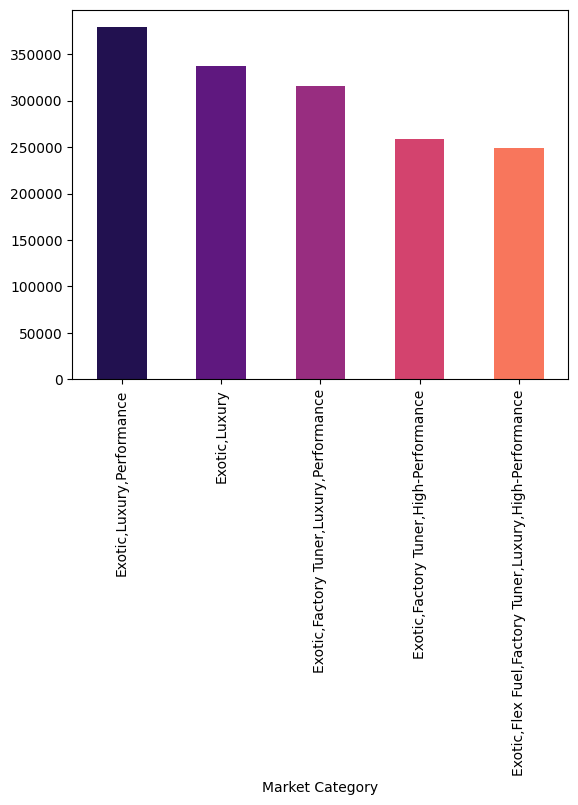

In [115]:
df2 = data.groupby('Market Category')['MSRP'].mean().sort_values(ascending = False).head(5)
df2.plot(kind = 'bar', color = sns.color_palette('magma'))
plt.show()

SO, The Exotic Luxury Performance cars have the Highest Avg MSRP

In [116]:
#7. Correlation among Horse Power and MSRP

In [78]:
cm = data.corr(numeric_only=True)

<Axes: >

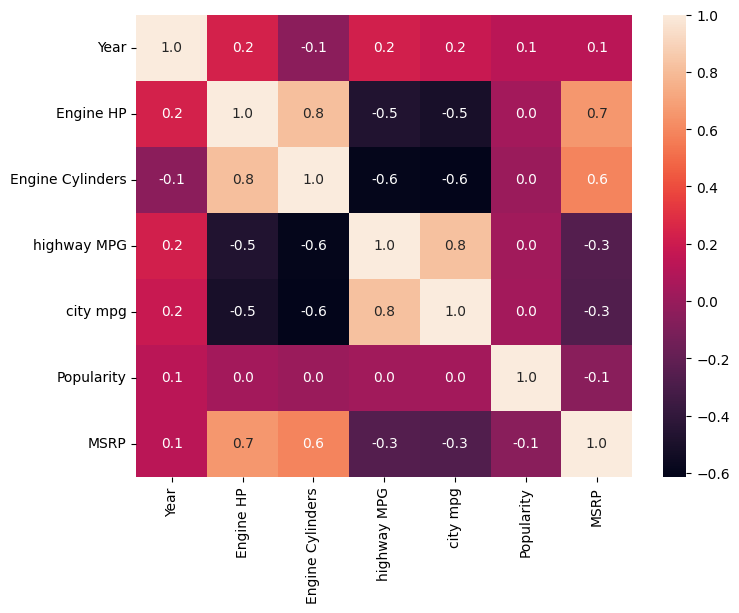

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True, fmt = '.1f')

So , from the Correlation Heatmap we can see that Engine HP and MSRP are highly correlated(0.7)

With higher Horse Power vehicle the MSRP are likely to be increased

8. Yearly MSRP increasing trend for Chevrolet and Ford

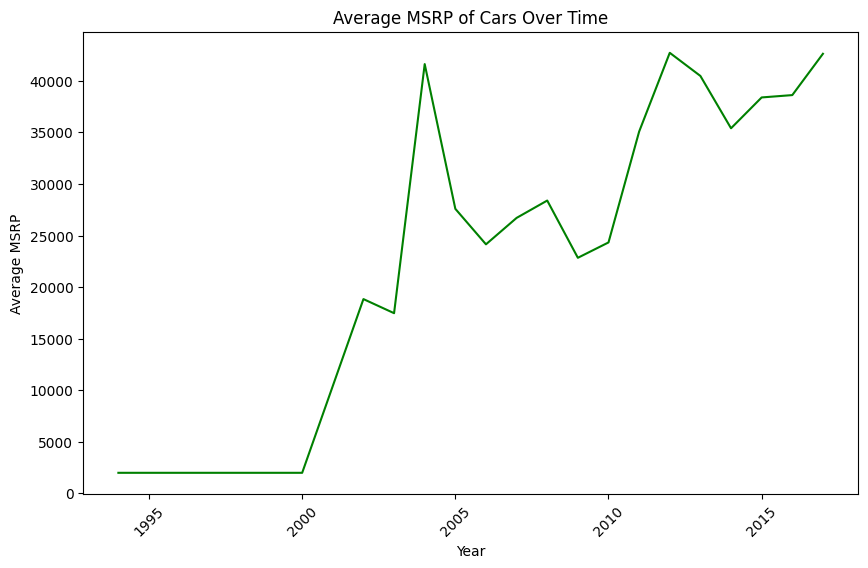

In [119]:
avg_msrp_by_year = df_chev.groupby('Year')['MSRP'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_msrp_by_year.index, avg_msrp_by_year.values, color = 'g')
plt.title('Average MSRP of Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)
plt.show()

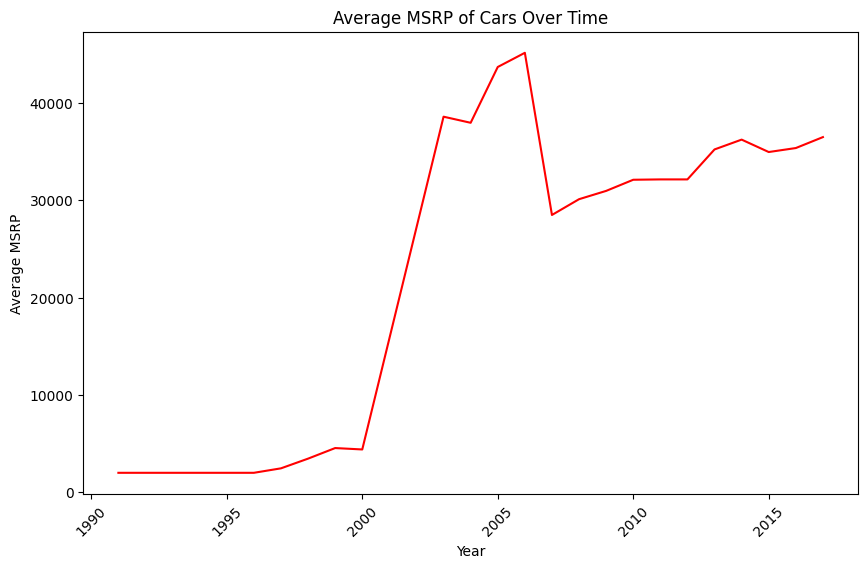

In [120]:
avg_msrp_by_year = df_ford.groupby('Year')['MSRP'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_msrp_by_year.index, avg_msrp_by_year.values, color = 'r')
plt.title('Average MSRP of Cars Over Time')
plt.xlabel('Year')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)
plt.show()

Around 2005 we can see the peak MSRP for both the brands

9. Highway Miles/Gallon statistical analysis

<ipython-input-95-c14e594993c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_ford['Year'], y = df_ford['highway MPG'], palette = 'dark')


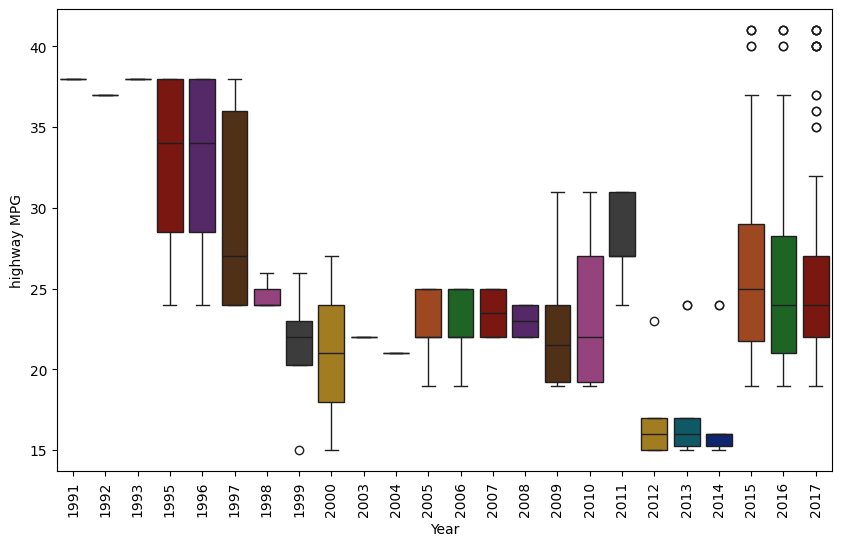

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_ford['Year'], y = df_ford['highway MPG'], palette = 'dark')
plt.xticks(rotation = 90)
plt.show()

at the year 1996 we can see the highest spread in the Highway MPG with overall highest mean as well for Ford brand.

Gradually we can observe that the MPG has decreased over time both the spread and the mean.

This could be possibly because the Focus might have shifted from Providing high mileage to delivering cars with high performance specs